In [64]:
import pandas as pd

history = pd.read_csv('data/unique_video_browsing_history_full_tiktok_data.csv')
likes = pd.read_csv('data/likes_full_tiktok_data.csv')
favorites = pd.read_csv('data/favorite_videos_full_tiktok_data.csv')
share = pd.read_csv('data/share_history_full_tiktok_data.csv')

In [65]:
# Remove nan values
import numpy as np
history['Hashtags'].replace(['None', 'nan', 'N/A'], np.nan, inplace=True)
history_hashtags = history[history['Hashtags'].notna()]['Hashtags']
history_hashtags
history_hashtags_list = history_hashtags.values.tolist()
# Initialize an empty list to store the individual hashtags
individual_hashtags = []
hashtags_duplicates = []

# Iterate through the list and split each string into individual hashtags
for string in history_hashtags_list:
    hashtags = []
    for tag in string.split(','):
        tag = tag.lower()
        tag = tag.strip()
        hashtags.append(tag)

    individual_hashtags.extend(hashtags)
    hashtags_duplicates.extend(hashtags)

print(len(individual_hashtags))

# Remove duplicates
individual_hashtags = list(set(individual_hashtags))
print(len(individual_hashtags))

# Remove empty strings
individual_hashtags = list(filter(None, individual_hashtags))
hashtags_duplicates = list(filter(None, hashtags_duplicates))
print(len(individual_hashtags))

697770
80006
80005


In [66]:
import re
# Define a regular expression pattern to match hashtags starting with "#fy" or "#fory"
pattern = r'#(fy\w+|fory\w+|fy|xyzbca|viral)'


# Use a list comprehension to filter out strings that match the pattern
filtered_text_list = [text for text in individual_hashtags if not re.search(pattern, text) and re.search('[a-zA-Z0-9]', text)]
hashtags_duplicates = [text for text in hashtags_duplicates if not re.search(pattern, text) and re.search('[a-zA-Z0-9]', text)]

len(filtered_text_list)

78967

In [67]:
# Get number of occurrences of each hashtag
from collections import Counter

hashtags_count = Counter(hashtags_duplicates)
print(hashtags_count)
# put it in a dataframe
hashtags_duplicate_df = pd.DataFrame.from_dict(hashtags_count, orient='index').reset_index()
hashtags_duplicate_df.columns = ['Hashtag', 'Count']
hashtags_duplicate_df.sort_values(by=['Count'], ascending=False, inplace=True)
hashtags_duplicate_df.head(10)

Counter({'#taylorswift': 9270, '#edit': 7657, '#batman': 6735, '#dc': 5487, '#dccomics': 5413, '#marvel': 4691, '#brucewayne': 4413, '#swifttok': 3483, '#erastour': 3314, '#spiderman': 3261, '#swiftie': 2833, '#tvd': 2179, '#greenscreen': 2097, '#starwars': 2088, '#barbie': 2021, '#trending': 1939, '#superman': 1857, '#capcut': 1856, '#taylorsversion': 1825, '#batmanedit': 1816, '#tedlasso': 1804, '#mcu': 1798, '#thevampirediaries': 1670, '#theerastour': 1661, '#pedropascal': 1654, '#peterparker': 1630, '#klausmikaelson': 1512, '#robin': 1496, '#tvdu': 1396, '#taylornation': 1386, '#comics': 1379, '#aftereffects': 1369, '#dcuniverse': 1360, '#stefansalvatore': 1309, '#brucewayneedit': 1268, '#nightwing': 1262, '#batfamily': 1260, '#dcedit': 1243, '#xmen': 1191, '#jasontodd': 1180, '#clarkkent': 1158, '#theoriginals': 1156, '#marvelcomics': 1151, '#comictok': 1111, '#milesmorales': 1066, '#barbiemovie': 1064, '#acrossthespiderverse': 1052, '#booktok': 1035, '#funny': 1031, '#parati': 10

,Hashtag,Count
7,#taylorswift,9270
44,#edit,7657
155,#batman,6735
695,#dc,5487
156,#dccomics,5413
56,#marvel,4691
349,#brucewayne,4413
300,#swifttok,3483
153,#erastour,3314
284,#spiderman,3261


In [68]:
# Find correlated hashtags
min_appearance = 1000
popular_hashtags_set = set(hashtags_duplicate_df[
                           hashtags_duplicate_df['Count']>=min_appearance
                           ]['Hashtag'])
popular_hashtags_set

{'#acrossthespiderverse',
 '#aftereffects',
 '#barbie',
 '#barbiemovie',
 '#batfamily',
 '#batman',
 '#batmanedit',
 '#booktok',
 '#brucewayne',
 '#brucewayneedit',
 '#capcut',
 '#clarkkent',
 '#comics',
 '#comictok',
 '#dc',
 '#dccomics',
 '#dcedit',
 '#dcuniverse',
 '#edit',
 '#erastour',
 '#funny',
 '#greenscreen',
 '#jasontodd',
 '#klausmikaelson',
 '#marvel',
 '#marvelcomics',
 '#mcu',
 '#milesmorales',
 '#nightwing',
 '#parati',
 '#pedropascal',
 '#peterparker',
 '#robin',
 '#spiderman',
 '#starwars',
 '#stefansalvatore',
 '#superman',
 '#swiftie',
 '#swifttok',
 '#taylornation',
 '#taylorsversion',
 '#taylorswift',
 '#tedlasso',
 '#theerastour',
 '#theoriginals',
 '#thevampirediaries',
 '#trending',
 '#tvd',
 '#tvdu',
 '#xmen'}

In [69]:
history_hashtags.columns = ['Hashtags']
history_hashtags_df = pd.DataFrame(history_hashtags)
history_hashtags_df.head()

,Hashtags
0,"#fandom, #fanfic, #fanfiction, #fandomhistory,..."
1,"#greenscreen, #sophieturner, #taylorswift, #jo..."
4,"#couple, #marriage, #relationship, #couplegoal..."
5,"#mysterypins, #blakespopnook, #disneydays, #ho..."
6,"#fyp, #foryou, #storytime, #teachersoftiktok, ..."


In [70]:
# make a new column with only the popular hashtags
history_hashtags_df['popular_hashtags'] = history_hashtags_df.Hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list.split(',')
                                  if hashtag in popular_hashtags_set])
    
# drop rows without popular hashtag
popular_hashtags_list_df = history_hashtags_df.loc[
            history_hashtags_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [71]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [72]:
hashtag_vector_df.head()

,popular_hashtags,#batfamily,#capcut,#brucewayneedit,#comictok,#batman,#spiderman,#aftereffects,#funny,#taylornation,...,#tvdu,#xmen,#brucewayne,#dc,#stefansalvatore,#trending,#acrossthespiderverse,#barbie,#greenscreen,#dcedit
1,[#greenscreen],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,[#taylorswift],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,[#taylorswift],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,[#taylorswift],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,[#greenscreen],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
# Drop popular_hashtags columns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

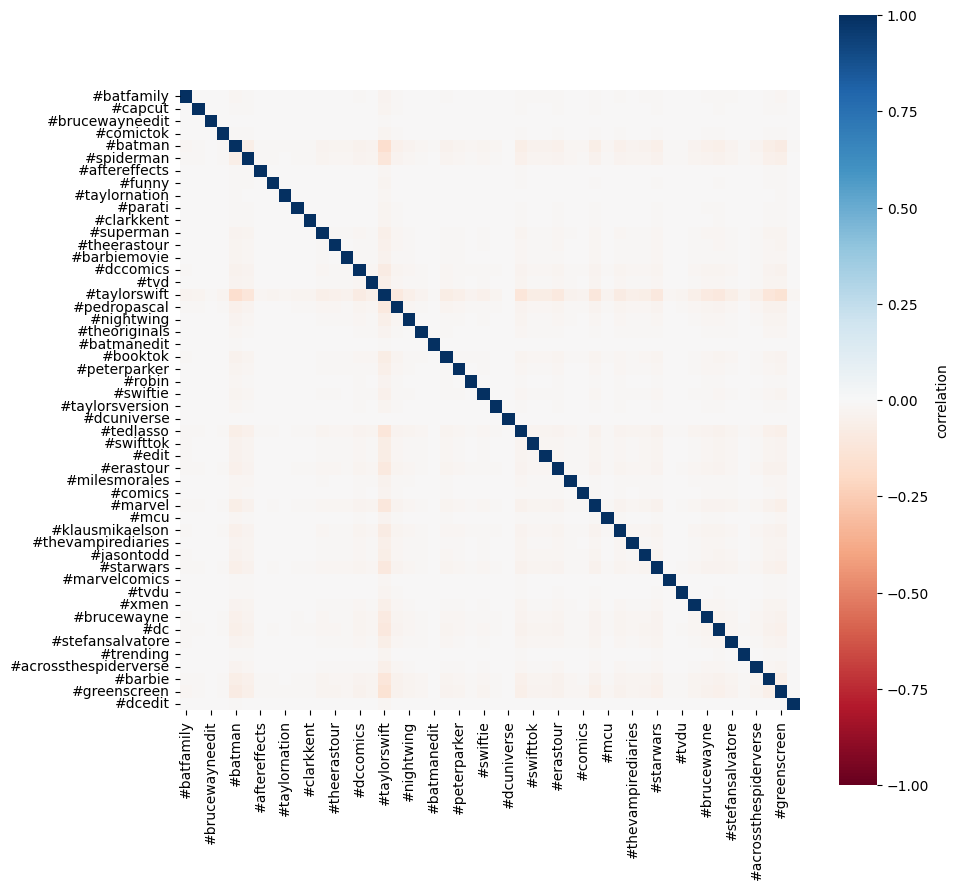

In [74]:
# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [75]:
from nltk.tokenize import word_tokenize

text = "#taylorswifterastour"
tokens = word_tokenize(text)

In [78]:
tokens

['#', 'taylorswifterastour']

In [81]:
"taylorswift" in "#taylorswifterastour"

True

In [91]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

lemma = lemmatizer.lemmatize("taylorswifterastour")
stem = stemmer.stem("taylorswifterastour")
print(stem)


taylorswifterastour


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Test\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [104]:
from sklearn.cluster import KMeans
from gensim.models import Word2Vec

# Example data: hashtags
hashtags = ["#booktok", "#book", "#movietok", "#movie", "#foodie", "#cooking"]

# Train a Word2Vec model on your hashtags
model = Word2Vec([hashtag.split() for hashtag in hashtags], vector_size=100, window=5, min_count=1, sg=0)

# Get the Word2Vec vectors for each hashtag and flatten them
hashtag_vectors = [model.wv[hashtag.split()].ravel() for hashtag in hashtags]

# Apply K-means clustering
num_clusters = 2 # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(hashtag_vectors)

# Get the cluster assignments for each hashtag
cluster_labels = kmeans.labels_

# Print the results
for i, hashtag in enumerate(hashtags):
    print(f"Hashtag: {hashtag}, Cluster: {cluster_labels[i]}")

# Visual inspection
clusters = {}
for i, label in enumerate(cluster_labels):
    if label in clusters:
        clusters[label].append(hashtags[i])
    else:
        clusters[label] = [hashtags[i]]

for cluster, hashtags in clusters.items():
    print(f"Cluster {cluster}: {', '.join(hashtags)}")

Hashtag: #booktok, Cluster: 0
Hashtag: #book, Cluster: 1
Hashtag: #movietok, Cluster: 0
Hashtag: #movie, Cluster: 1
Hashtag: #foodie, Cluster: 1
Hashtag: #cooking, Cluster: 1
Cluster 0: #booktok, #movietok
Cluster 1: #book, #movie, #foodie, #cooking


### Understanding and Clustering Hashtags According to their Word Distributions
**Different methodologies**
-  A simple way has been used in this study for a cluster by using cosine similarity as a distance measure, while the term frequency and inverse document frequency (TF-IDF) can be used as a weighting scheme. If the similarity metric was above the assigned threshold value, then groups of topics were clustered and this clustering continues until no more tokens can be added to the cluster.
- Calculate the Jensen-Shannon divergence between any two hashtags by using the word distribution of each
hashtag. Cluster hashtags by using Jensen-Shannon divergence as distance measure and generate dendrogram to show clustering results.

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import numpy as np

# Example hashtags
hashtags = filtered_text_list[:1000]

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(hashtags)

# Step 2: Clustering with DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(tfidf_matrix)

# Step 3: Organize hashtags into clusters
unique_clusters = np.unique(clusters)
clustered_hashtags = {cluster: [] for cluster in unique_clusters}
for i, cluster in enumerate(clusters):
    clustered_hashtags[cluster].append(hashtags[i])

# Print the final clusters
for cluster in unique_clusters:
    print(f"Cluster {cluster}:")
    for hashtag in clustered_hashtags[cluster]:
        print(hashtag)
    print()


Cluster -1:
#localcomicshop
#adambrody
#zarasummer
#pettricks
#kadebtw
#bestnintendogames
#troybaker
#qsmpclip
#nwsl
#primeirovideo😶
#maximalism
#castielwinchester
#eg2022
#funn
#adventureswithsuperman
#affordablecars
#gpt
#kenmojodojocasahouse
#avataredit
#jaynehoudyshell
#charmedoriginal
#hl
#garrethweasleyedit
#taylorcinspiracy
#editsss
#applecarplay
#teamdiana
#waydownwego
#killianjonesouat
#kierralewis
#smores
#cattiktok
#wallydarlingwelcomehomeedit
#sixfigureincome
#iftar
#howardstern
#rainbowmagicfairies
#beyoncebday
#dogswithjobs
#shanedawson
#buckybarnesedits
#solar
#shrekswampstories
#property
#colbaltblue
#joaquintorres
#visionmarvel
#uap
#starlink
#speedingticket
#dannyfentoncosplay
#mirandalambert
#drmidnite
#dadsontiktok
#endosisters
#affairsgonewrong
#minekosnightmarket
#presenteaniversariodenamoro
#funkopopsoda
#deanainchesteredit
#pooh
#supremefamily
#stickershop
#poder
#queenandking
#firstcaressentials
#selinakyleswife
#lightroompreset
#dccostumedesign
#legendofvoxmac

In [112]:
# Test - try to get all taylor swift related hashtags
taylor_swift_list = []
for hashtag in filtered_text_list:
    if "taylorswift" in hashtag and hashtag != "taylorswift":
        taylor_swift_list.append(hashtag)
    
for i in taylor_swift_list:
    print(i)

#taylorswiftwouldvecouldveshouldve
#ididsomethingbadtaylorswift
#taylorswiftcardigan
#13taylorswift
#drunktaylorswift
#makingofasongtaylorswift
#taylorswiftcore
#itsaclocktaylorswift
#taylorswiftchaicookies
#taylorswift1989tv
#taylorswifterastoureerastour
#taylorswiftspedup
#taylorswiftex
#eletrictouchtaylorswift
#lavenderhazetaylorswift
#taylorswiftconcerttips
#taylorswiftrumors
#mirrorballtaylorswift
#reptaylorswift
#taylorswift22
#taylorswiftandsabrinacarpenter
#floorseatstaylorswift
#folkloretaylorswift
#newromanticstaylorswift
#taylorswiftkarliekloss
#taylorswifteras2024
#taylorswiftlondon
#electricladystudiostaylorswift
#taylorswiftworkout
#taylorswifteeras
#sluttaylorswift
#taylorswiftaicover
#glitchtaylorswift
#taylorswifteducationcenter
#taylorsversiontaylorswift
#taylorswiftlumen
#taylorswiftboyfriend
#taylorswiftdad
#taylorswifts
#taylorswiftsophieturner
#oliviarodrigoandtaylorswift
#taylorswiftukdates
#antiherotaylorswift
#lastkisstaylorswift
#taylorswifttampa
#taylorswiftw

In [150]:
# Chatgpt says that we might need domain specific preprocessing
# Step 1 was cleaning the #fy, #foryou, etc. hashtags
# Step 2 will be to remove the "tok" or "tiktok" from the hashtags, such as #booktok, #childfreetiktok, #tiktokdogschallenge

def remove_tok_from_hashtag(hashtag):
    # Use a regular expression to remove "tok" or "tiktok" from the hashtag
    pattern1 = r'(tiktok|tok)$'
    pattern2 = r'^(#tiktok|#tok)'
    cleaned_hashtag = re.sub(pattern1, '', hashtag, flags=re.IGNORECASE)
    cleaned_hashtag = re.sub(pattern2, '#', cleaned_hashtag, flags=re.IGNORECASE)
    return cleaned_hashtag

# Use a list comprehension to filter out strings that match the pattern
filtered_text_list = [remove_tok_from_hashtag(text) for text in filtered_text_list]
hashtags_duplicates = [remove_tok_from_hashtag(text) for text in hashtags_duplicates]

78967